#TSF- TASK 6
**Prediction using Decision Tree Algorithm** <br>
**AUTHOR- PRIYA N V** <br>
Problem statement -Create the Decision Tree classifier for iris dataset and visualize it graphically.

1.Import the data and perform exploratory data analysis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
url='https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
iris = pd.read_csv(url)

In [2]:
# (Q) how many data-points and features?
print (iris.shape)

(150, 5)


In [3]:
#(Q) What are the column names in our dataset?
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [4]:
#(Q) How many data points for each class are present? 

iris["species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


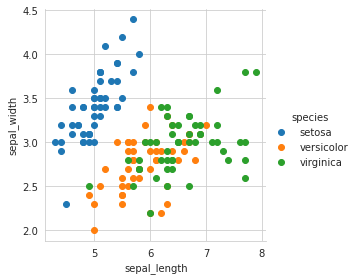

In [6]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


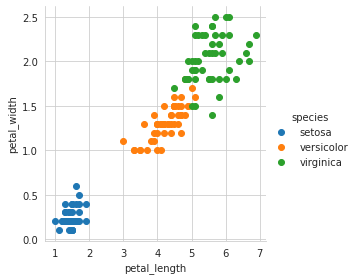

In [7]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend();
plt.show();

 petal_width and petal_length features classify the species well.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


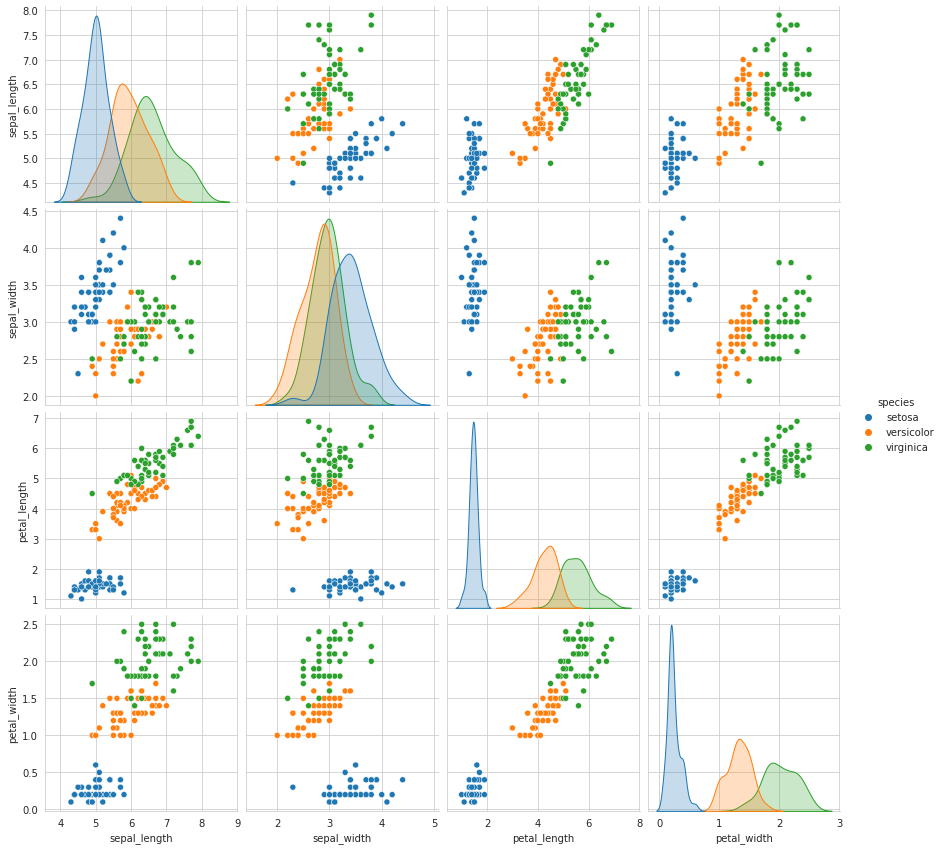

In [9]:
# pairwise scatter plot: Pair-Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.show()

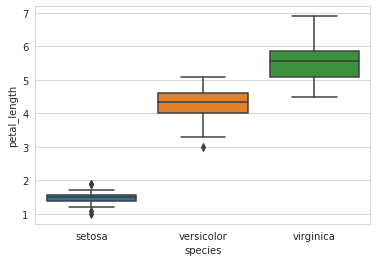

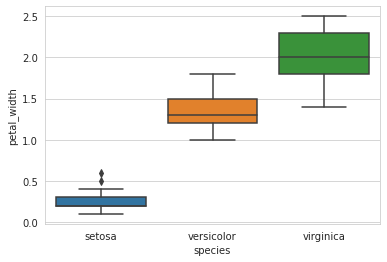

In [10]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()
sns.boxplot(x='species',y='petal_width', data=iris)
plt.show()

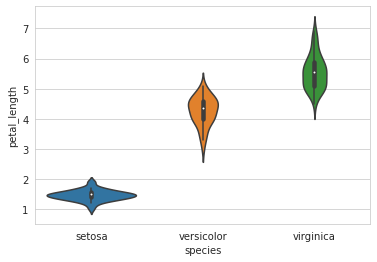

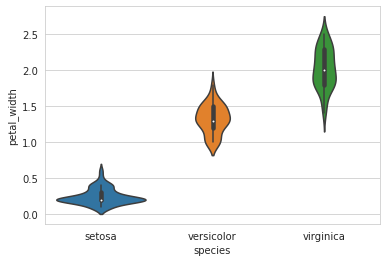

In [11]:
# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

sns.violinplot(x="species", y="petal_width", data=iris, size=8)
plt.show()

In [12]:
#Its observed from the above analysis that petal length and petal width features classify the species better compared to sepal_length/width.

2.Split dataset into training and test set and preprocessing.

In [13]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
iris['species']= label_encoder.fit_transform(iris['species']) 
  
print(iris['species'].unique() )

#choosing features and target

X=iris.iloc[:,:-1]
y=iris['species']
print(X.shape)
print(y.shape)

[0 1 2]
(150, 4)
(150,)


In [18]:
# Import library for splitting the dataset into train and test.
from sklearn.model_selection import train_test_split
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size = 0.25)

4.Training the model


In [19]:
#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
# Changing the Criterion to Entropy
clf_entropy = DecisionTreeClassifier(criterion = 'entropy')
#Training the decision tree classifier. 
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

5.Accuracy

In [22]:
#prediction
y_pred = clf.predict(X_test)
#Importing the accuracy metric from sklearn.metrics library
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data (using Default criterionas gini): ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data (using Default criterionas gini): ', accuracy_score(y_true=y_test, y_pred=y_pred))
#Predicting labels on the test set.
y_pred_entropy =  clf_entropy.predict(X_test)
print('Accuracy Score on train data (using Default criterion as Entropy): ', accuracy_score(y_true=y_train, y_pred =clf_entropy.predict(X_train)))
print('Accuracy Score on test data (using Default criterion as Entropy): ', accuracy_score(y_true=y_test, y_pred =y_pred_entropy))

Accuracy Score on train data (using Default criterionas gini):  1.0
Accuracy Score on test data (using Default criterionas gini):  0.9473684210526315
Accuracy Score on train data (using Default criterion as Entropy):  1.0
Accuracy Score on test data (using Default criterion as Entropy):  0.9473684210526315


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
print(cm)

[[11  0  0]
 [ 0 14  1]
 [ 0  1 11]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(X.iloc[0,])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        15
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64


In [27]:
!pip install pydotplus
print(X.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


6.Visualize the tree

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


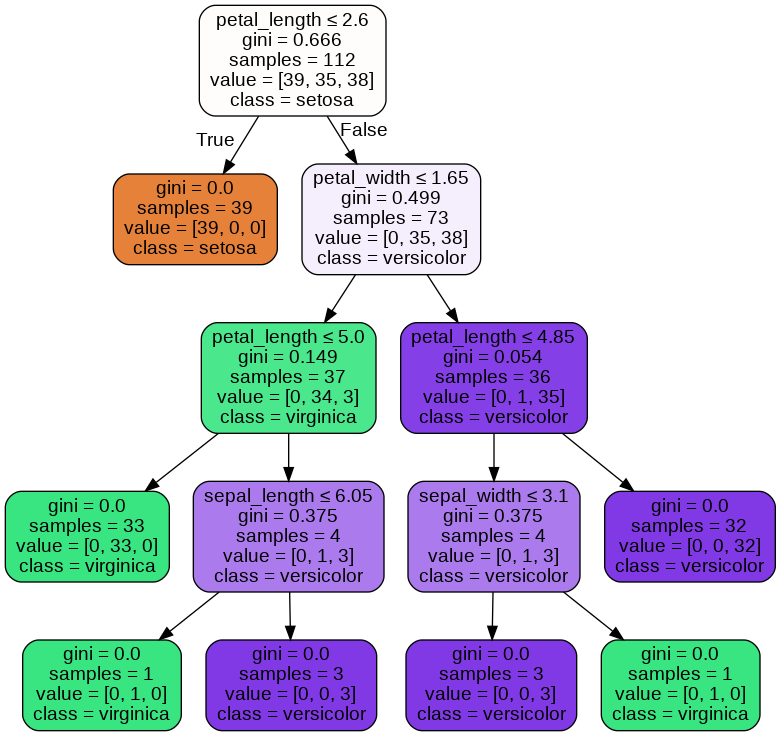

In [26]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['setosa','virginica','versicolor'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())